In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df1 = df.copy()
df1 = df1.drop(columns=['Cabin','Name','PassengerId','Ticket'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [7]:
from sklearn.impute import SimpleImputer
a = SimpleImputer(missing_values=np.nan,strategy='mean')
df1.Age = a.fit_transform(df1[['Age']])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [8]:
b = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df1.Embarked = b.fit_transform(df1[['Embarked']])[:,0]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
c = OneHotEncoder(sparse_output=False)
encoded = c.fit_transform(df1[['Sex','Embarked']])
encoded_df = pd.DataFrame(encoded,columns=c.get_feature_names_out())
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [11]:
encoded_df.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [12]:
final_df = pd.concat([df1.drop(columns=['Sex','Embarked']),encoded_df],axis=1)

In [13]:
final_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


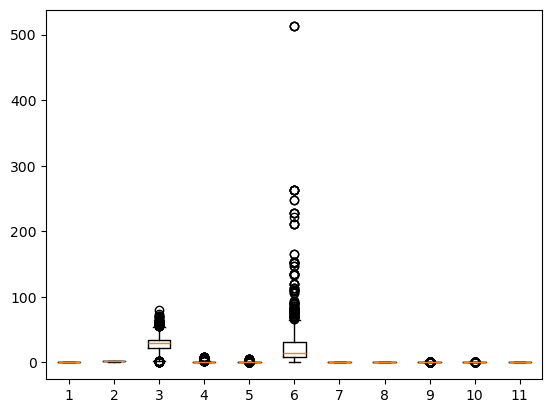

In [14]:
plt.boxplot(final_df)
plt.show()

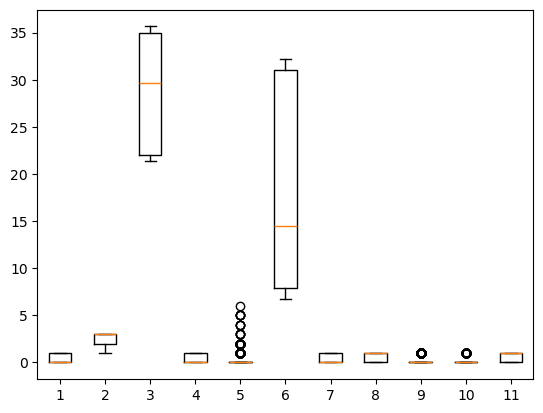

In [15]:
from feature_engine.outliers import Winsorizer
d = Winsorizer(capping_method='iqr', tail='both', fold=0.05, variables=['Age', 'Fare','SibSp'])
winzed_df = d.fit_transform(final_df)
plt.boxplot(winzed_df)
plt.show()

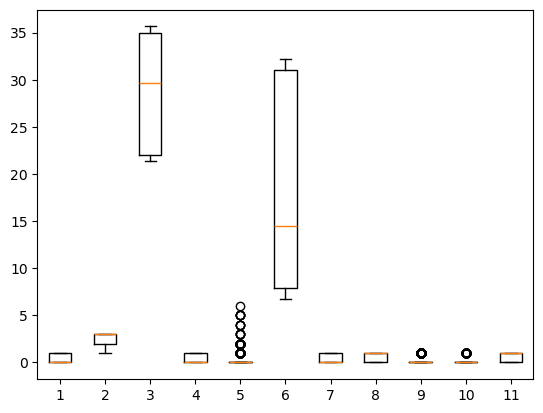

In [16]:
e = Winsorizer(capping_method='quantiles', tail='both', fold=0.05, variables=['Parch'])
winzed_df = d.fit_transform(final_df)
plt.boxplot(winzed_df)
plt.show()

In [17]:
winzed_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.00,1.0,0,7.25000,0.0,1.0,0.0,0.0,1.0
1,1,1,35.65,1.0,0,32.15448,1.0,0.0,1.0,0.0,0.0
2,1,3,26.00,0.0,0,7.92500,1.0,0.0,0.0,0.0,1.0
3,1,1,35.00,1.0,0,32.15448,1.0,0.0,0.0,0.0,1.0
4,0,3,35.00,0.0,0,8.05000,0.0,1.0,0.0,0.0,1.0


In [18]:
X = winzed_df.iloc[:,1:]
Y = winzed_df.iloc[:,:1]

In [19]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.00,1.0,0,7.25000,0.0,1.0,0.0,0.0,1.0
1,1,35.65,1.0,0,32.15448,1.0,0.0,1.0,0.0,0.0
2,3,26.00,0.0,0,7.92500,1.0,0.0,0.0,0.0,1.0
3,1,35.00,1.0,0,32.15448,1.0,0.0,0.0,0.0,1.0
4,3,35.00,0.0,0,8.05000,0.0,1.0,0.0,0.0,1.0


In [20]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [22]:
import statsmodels.api as sm
model = sm.Logit(Y_train,X_train).fit()
model.summary()


Optimization terminated successfully.
         Current function value: 0.462837
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Sun, 06 Jul 2025   Pseudo R-squ.:                  0.3048
Time:                        11:02:14   Log-Likelihood:                -329.54
converged:                       True   LL-Null:                       -473.99
Covariance Type:            nonrobust   LLR p-value:                 9.463e-58
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -1.1294      0.212     -5.332      0.000      -1.545      -0.714
Age           -0.0599      0.020     -3.049      0.002      -0.098      -0.021
SibSp         -0.0110      0.254     -0.043      0.966      -0.509       0.487
Parch         -0.0682      0.143     -0.477      0.634      -0.349       0.212
Fare          -0.0123      0.019     -0.649      0.517      -0.050       0.025
Sex_female     4.0379        nan        nan        nan         nan         nan
Sex_male       1.4264        nan        nan        nan         nan         nan
Embarked_C     1.9067        nan        nan        nan         nan         nan
Embarked_Q     2.0451        nan        nan        nan         nan         nan
Embarked_S     1.5125        nan        nan        nan         nan         nan
==============================================================================
"""

In [23]:
test_pred = model.predict(X_test)
print('Actual values', list(Y_test.values))
print('Predictions :', test_pred)

Actual values [array([0]), array([0]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([0]), array([1]), array([1]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([1]), array([0]), array([0]), array([0]), array([1]), array([0]), array([1]), array([1]), array([0]), array([0]), array([1]), array([0]), array([1]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([1]), array([0]), array([0]), array([1]), array([1]), array([1]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([1]), array([0]), array([1]), array([0]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), a

In [24]:
# Convert to binary class labels using a 0.5 threshold
test_pred = (test_pred >= 0.5).astype(int)

In [25]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)

# confusion matrix
cm = confusion_matrix(Y_test, test_pred) 
print ("Confusion Matrix : \n", cm) 

# accuracy score of the model
print('Test accuracy = ', accuracy_score(Y_test, test_pred))

Confusion Matrix : 
 [[93 17]
 [19 50]]
Test accuracy =  0.7988826815642458


In [26]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(Y_test, test_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(X_train, Y_train)

/opt/anaconda3/envs/dS/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/dS/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X_test)

mse = mean_squared_error(Y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(Y_test, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.21797289277691023
Mean Squared Error: 0.15127668959576382
R-squared: 0.36138914211622286


In [29]:
print(predictions)

[0.4        0.1        0.1        1.         0.2        0.025
 1.         0.9        0.4        0.8        0.2        0.73309524
 0.16       1.         1.         0.9        0.         0.9
 0.04722222 0.5        0.         1.         0.00666667 0.025
 0.6        1.         0.12       0.9        0.9        0.
 0.1        0.75833333 0.1        0.         0.         0.175
 0.         0.1        0.         0.01428571 0.1        0.4
 0.1        0.         1.         0.         0.         0.925
 0.07706349 0.22833333 0.025      0.1        0.9        0.
 0.         0.4        0.42583333 0.         0.06       0.
 0.1        0.8        1.         0.1        0.8        0.21666667
 0.9        0.1        1.         1.         0.85       0.225
 0.3        0.         0.         0.4        0.9        0.3375
 0.         0.3        0.         0.8        0.8        0.
 0.         1.         1.         0.5        0.925      0.5
 0.         0.         0.9        1.         0.         0.09333333
 0.95     

In [30]:
predictions = (predictions >= 0.5).astype(int)
print('Test accuracy = ', accuracy_score(Y_test, predictions))

Test accuracy =  0.8044692737430168


In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_digits

gbc = GradientBoostingClassifier(n_estimators=1000,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
                                 
gbc.fit(X_train, Y_train)

pred_y = gbc.predict(X_test)

acc = accuracy_score(Y_test, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

/opt/anaconda3/envs/dS/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Classifier accuracy is : 0.83


In [32]:
pred_y

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [56]:
from xgboost import XGBClassifier
bst = XGBClassifier(n_estimators=2, max_depth=10, learning_rate=1, objective='binary:logistic')
bst.fit(X_train, Y_train)
pred_xgb = bst.predict(X_test)
acc = accuracy_score(Y_test,pred_xgb)
print(acc)

0.8379888268156425


In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, learning_rate=1.0, random_state=42)
adat = adaboost_classifier.fit(X_train, Y_train)
pred_ada = adat.predict(X_test)
acc_ada = accuracy_score(Y_test,pred_ada)
print(acc_ada)

0.7988826815642458


/opt/anaconda3/envs/dS/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
tree = DecisionTreeClassifier()
dt = tree.fit(X_train,Y_train)
pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(Y_test,pred_dt)
print(acc_dt)

0.7486033519553073


In [66]:
from sklearn import linear_model
clfl = linear_model.Lasso(alpha=0.25)
clfl_t = clfl.fit(X_train,Y_train)
pred_clfl = clfl_t.predict(X_test)
pred_clfl = (pred_clfl>=0.5).astype('int64')
acc_clfl = accuracy_score(Y_test,pred_clfl)
print(acc_clfl)

0.7150837988826816


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='hard')
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train, Y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


/opt/anaconda3/envs/dS/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dS/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/dS/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

Accuracy: 0.79 (+/- 0.03) [Logistic Regression]


/opt/anaconda3/envs/dS/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/dS/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/dS/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/dS/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

Accuracy: 0.78 (+/- 0.02) [Random Forest]
Accuracy: 0.77 (+/- 0.03) [naive Bayes]


/opt/anaconda3/envs/dS/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dS/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/dS/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

Accuracy: 0.79 (+/- 0.02) [Ensemble]


/opt/anaconda3/envs/dS/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dS/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/envs/dS/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

In [73]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
estimators = [('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42)),
              ('knr', KNeighborsRegressor(n_neighbors=20,
                                          metric='euclidean'))]

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
final_estimator = GradientBoostingRegressor(
    n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,
    random_state=42)
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator)

reg_t = reg.fit(X_train, Y_train)
pred_reg = reg_t.predict(X_test)
pred_reg = (pred_reg>=0.5).astype('int64')
acc_reg = accuracy_score(Y_test,pred_reg)
print(acc_reg)

0.8156424581005587


/opt/anaconda3/envs/dS/lib/python3.11/site-packages/sklearn/ensemble/_stacking.py:1060: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
df2 = pd.read_csv(r"test.csv")

In [34]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
df3 = df2.copy()
df3 = df3.drop(columns=['Cabin','Name','PassengerId','Ticket'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [36]:
df3.Age = a.fit_transform(df3[['Age']])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [37]:
df3.Fare = a.fit_transform(df3[['Fare']])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [38]:
encoded1 = c.fit_transform(df3[['Sex','Embarked']])
encoded_df1 = pd.DataFrame(encoded1,columns=c.get_feature_names_out())
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [39]:
final = pd.concat([df3.drop(columns=['Sex','Embarked']),encoded_df1],axis=1)

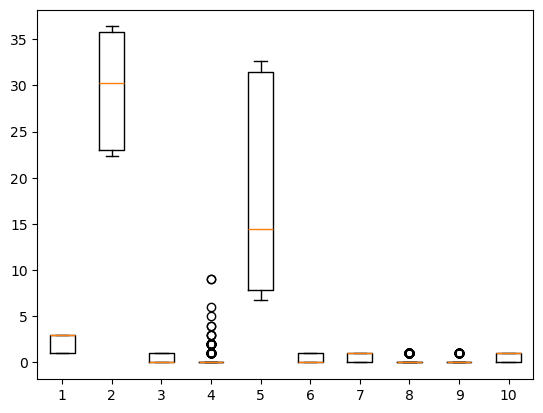

In [40]:
winzed = d.fit_transform(final)
plt.boxplot(winzed)
plt.show()

In [41]:
X1 = winzed.iloc[:,:]

In [42]:
X1.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5000,0.0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,3,36.3875,1.0,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,2,36.3875,0.0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,3,27.0000,0.0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,3,22.3625,1.0,1,12.2875,1.0,0.0,0.0,0.0,1.0


In [57]:
pred_testing = bst.predict(X1)
pred_testing

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [58]:
submission = pd.DataFrame({
    'PassengerId': df2['PassengerId'],
    'Survived': pred_testing
})
submission.to_csv('submission1.csv', index=False)